Exercise for Graph II 🏆
🏗Your task:
## Create a Graph where you pass in a single list of integers along with a name and an
operation. If the operation is a “+”, you add the elements and if it is a “*”, you
multiply the elements, all within the same node.
Input: {"name": "Jack Sparrow","values": [1,2,3,4] , "operation": "*"}
Output: "Hi Jack Sparrow, your answer is: 24" 
Hint: You need an if-statement in your node!

In [12]:
from typing import TypedDict,List
from langgraph.graph import StateGraph

## build the AgentState Class for structured dict

In [13]:
class MyStateGraph(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str

## build the function for the node

In [23]:
def processor(math_operation: MyStateGraph) -> MyStateGraph:
    """Calculate math on the list of int values according to the operation and return a result"""
    if math_operation["operation"] == '+':
        answer  = sum(math_operation["values"])
    elif math_operation["operation"] == '*':
        answer = 1
        for v in math_operation["values"]:
            answer *= v
    math_operation["result"] = f'Hi {math_operation["name"] }, your answer is : {answer}'
    return math_operation


## Create the graph

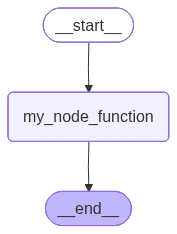

In [24]:
graph = StateGraph(MyStateGraph)

graph.add_node("my_node_function", processor)
graph.set_entry_point("my_node_function")
graph.set_finish_point("my_node_function")

app = graph.compile()
app

## Invoke the app graph

In [26]:
app_results = app.invoke({
    "values": [1, 2, 3],
    "name": "Rachel",
    "operation": "+",
    "result": ""
})
app_results["result"]

'Hi Rachel, your answer is : 6'

In [28]:
app_results = app.invoke({
    "values": [10, 2, 3],
    "name": "Rachel",
    "operation": "*",
    "result": ""
})
app_results["result"]

'Hi Rachel, your answer is : 60'